In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-9.000548389506037 -99.21245964002807
68.99733071703 176.99006798240714
-5.828776584930054 -178.0903553596182
-89.39584327920973 16.101827483561124
38.67930325144181 -152.4472195802401
34.15093882938584 8.652013595604899
-2.170087325884893 111.43455567498609
58.74084710998781 82.91067401173171
-19.189438431744847 27.907612933107885
-52.83116027652941 -144.71741617628103
-74.5215193167238 31.27028328247198
3.506710008093961 45.39484429454615
23.552126500593758 106.42699387632626
42.70372560198021 -85.01572165057989
52.909157201077306 151.81483673465914
-51.36093418775443 152.21559733524117
41.65580004812193 -69.69159268293922
-55.07365663214364 -116.21339003548026
17.991167380496776 -77.37424630483902
36.81262815048581 84.60847158925452
-11.512515024090916 -126.80024893949498
74.36749656443808 -169.2709748717188
-30.457797697920924 83.19775769710185
-34.18490367396832 37.347879932414315
73.88818989330093 91.10314978888113
-68.82272943262767 106.50574149361722
-0.3257769152831145 141.810

-40.55665629128506 61.88381796731085
54.053237434600504 -160.05733319183113
-42.20011072441316 -85.08869470659049
45.47365797139966 -65.7380190369442
-55.75112942282071 58.26528425059476
-16.94021649781243 -125.15234196041206
8.823404215473104 -86.97467426270396
53.616155440716255 176.28328482292943
18.03732519999025 -162.91961059105262
-64.05727721962168 129.1414457072749
-17.357763676819516 55.47742787380932
15.636325728452192 -4.477278983074797
80.21378625628049 66.62493323084897
59.06299129166425 -70.62916575790052
-45.33754910946782 -135.65021398937412
-53.864801090961464 52.467894517893
13.159448564714808 2.0541245184365096
-5.05628227273651 111.52904035436154
-87.81971495073206 -12.82181497296449
10.333209509782648 119.8389332180281
76.80067336467422 -11.015875626833378
-5.484408716392181 2.273946806680243
33.51941202672462 11.19194931904488
-48.560757447470905 109.72490008756915
-28.610984097086444 91.62711150689279
-4.20006735922999 48.989033348770135
-5.864137640664836 9.2214

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | qafsah
City not found. Skipping...
Processing Record 7 of Set 1 | pangkalanbuun
Processing Record 8 of Set 1 | togur
Processing Record 9 of Set 1 | bulawayo
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 13 of Set 1 | bose
Processing Record 14 of Set 1 | ionia
Processing Record 15 of Set 1 | sobolevo
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | harwich
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | mandeville
Processing Record 20 of Set 1 | korla
Processing Record 21 of Set 1 | atuona


Processing Record 37 of Set 4 | rundu
Processing Record 38 of Set 4 | marsh harbour
Processing Record 39 of Set 4 | lodja
Processing Record 40 of Set 4 | nenjiang
Processing Record 41 of Set 4 | hervey bay
Processing Record 42 of Set 4 | saint-georges
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | ayagoz
Processing Record 45 of Set 4 | tiznit
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | ternate
Processing Record 49 of Set 4 | mianyang
Processing Record 50 of Set 4 | yatou
Processing Record 1 of Set 5 | higuey
City not found. Skipping...
Processing Record 2 of Set 5 | phan thiet
Processing Record 3 of Set 5 | okha
Processing Record 4 of Set 5 | arlit
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Processing Record 7 of Set 5 | hami
Processing Record 8 of Set 5 | saint-pierre
Processing Record 9 of Set 5 | goderich
Processing Record 10

Processing Record 31 of Set 8 | bafoulabe
Processing Record 32 of Set 8 | rezekne
Processing Record 33 of Set 8 | illapel
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | hithadhoo
Processing Record 38 of Set 8 | riverton
Processing Record 39 of Set 8 | hargeysa
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | cassilandia
Processing Record 42 of Set 8 | prince rupert
Processing Record 43 of Set 8 | faya
Processing Record 44 of Set 8 | tazovskiy
Processing Record 45 of Set 8 | oudtshoorn
Processing Record 46 of Set 8 | ondjiva
Processing Record 47 of Set 8 | yumbo
Processing Record 48 of Set 8 | te anau
Processing Record 49 of Set 8 | peto
Processing Record 50 of Set 8 | santa maria
Processing Record 1 of Set 9 | jalu
Processing Record 2 of Set 9 | trincomalee
Processing Record 3 of Set 9 | korsakov
Processing Record 4 of Set 9 | zverinogolovskoy

Processing Record 19 of Set 12 | parthenay
Processing Record 20 of Set 12 | yerbogachen
Processing Record 21 of Set 12 | solnechnyy
Processing Record 22 of Set 12 | esna
Processing Record 23 of Set 12 | kiunga
Processing Record 24 of Set 12 | barcelos
Processing Record 25 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 26 of Set 12 | sayyan
Processing Record 27 of Set 12 | cali
Processing Record 28 of Set 12 | gornopravdinsk
Processing Record 29 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 30 of Set 12 | camacha
Processing Record 31 of Set 12 | kiama
Processing Record 32 of Set 12 | erzin
Processing Record 33 of Set 12 | longyan
Processing Record 34 of Set 12 | los llanos de aridane
Processing Record 35 of Set 12 | mogadishu
Processing Record 36 of Set 12 | sosva
Processing Record 37 of Set 12 | loandjili
Processing Record 38 of Set 12 | inhambane
Processing Record 39 of Set 12 | dosso
Processing Record 40 of Set 12 | takoradi
Processing R

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.55,83,84,5.01,EC,2022-07-01 10:22:20
1,Leningradskiy,69.3833,178.4167,38.66,91,100,3.78,RU,2022-07-01 10:22:21
2,Bredasdorp,-34.5322,20.0403,71.02,39,76,10.11,ZA,2022-07-01 10:22:21
3,Kapaa,22.0752,-159.3190,77.32,84,100,17.27,US,2022-07-01 10:22:22
4,Pangkalanbuun,-2.6833,111.6167,81.48,73,100,4.99,ID,2022-07-01 10:22:22
5,Togur,58.3631,82.8265,55.26,89,90,11.52,RU,2022-07-01 10:21:19
6,Bulawayo,-20.1500,28.5833,62.35,51,69,12.82,ZW,2022-07-01 10:22:23
7,Mataura,-46.1927,168.8643,47.48,93,96,6.02,NZ,2022-07-01 10:22:23
8,Port Elizabeth,-33.9180,25.5701,79.32,25,0,9.22,ZA,2022-07-01 10:22:24
9,Bose,45.4612,8.0137,80.24,66,13,3.85,IT,2022-07-01 10:22:24


In [14]:
# reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-07-01 10:22:20,-0.7393,-90.3518,69.55,83,84,5.01
1,Leningradskiy,RU,2022-07-01 10:22:21,69.3833,178.4167,38.66,91,100,3.78
2,Bredasdorp,ZA,2022-07-01 10:22:21,-34.5322,20.0403,71.02,39,76,10.11
3,Kapaa,US,2022-07-01 10:22:22,22.0752,-159.3190,77.32,84,100,17.27
4,Pangkalanbuun,ID,2022-07-01 10:22:22,-2.6833,111.6167,81.48,73,100,4.99
5,Togur,RU,2022-07-01 10:21:19,58.3631,82.8265,55.26,89,90,11.52
6,Bulawayo,ZW,2022-07-01 10:22:23,-20.1500,28.5833,62.35,51,69,12.82
7,Mataura,NZ,2022-07-01 10:22:23,-46.1927,168.8643,47.48,93,96,6.02
8,Port Elizabeth,ZA,2022-07-01 10:22:24,-33.9180,25.5701,79.32,25,0,9.22
9,Bose,IT,2022-07-01 10:22:24,45.4612,8.0137,80.24,66,13,3.85


In [15]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

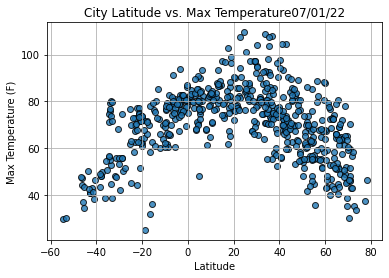

In [17]:
# Imoport time module

import time

# build the scatter plot for latitude vs. max tempterature

plt.scatter(lats, 
            max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# show plot.

plt.show

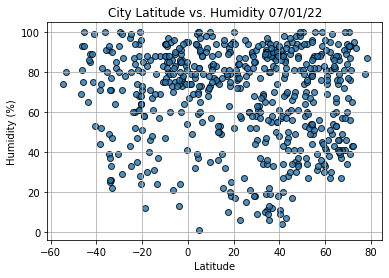

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

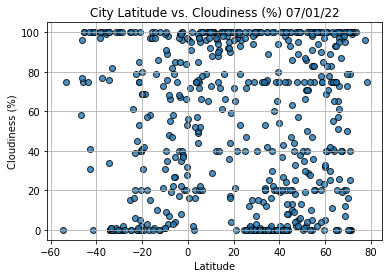

In [19]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

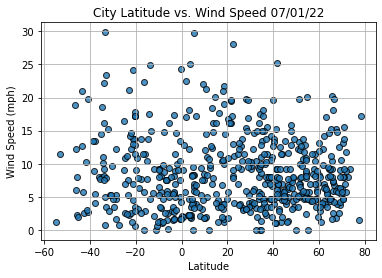

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()